<h1>How Great was The Great One?</h1>
<h3>A deep dive into the game-changing legacy of Wayne Gretzky</h3>
<h5>By Phil Rongo</h5>


<h2>Abstract:</h2>
Wayne Gretzky has been called “The Greatest Hockey Player who Ever Lived” by fans, coaches, fellow NHL players, and even the NHL itself. It should be reasonable to assert that because of his abounding dominance in the game of hockey, talent scouts and team managers would be wise to look for "Gretzky-like" qualities in their prospects. In this notebook, we venture to complete three objectives:

1. Display how visually just how dominant The Great One truly was - across almost all facets of the game. We will visualize offensive, defensive, and liability aspects of Gretzky's game and compare his achievements and statistics against his peers of the 1986-87 and also current NHL players of the 2022 season.

2. Quantify how prevalent are "Gretzky-like" performance among the league's all-time superstars.

3. Explain how might scouts utilize this information to build better teams.

Raw data for this project was gathered from the **Hockey Reference** website (https://www.hockey-reference.com/), however some datasets - such as career_stats_greats.csv - were manually spliced together from multiple pages on their website.



<h2>Data PreProcessing</h2>

First, we will preprocess our data. We'll start by loading our three separate datasets into dataframes. These datasets will encompass:

- Total career stats of all-time greats and current NHL stars
- Stats for all players during the 1986-1987 season - a season often held to be Gretzky's best
- Stats for all players during the 2022-2023 season - a recent season of intense competition

All of these dataframes include the same information - with the exception of TOI (time on ice), which was not recorded until 1997. As such, 1986-1987 is missing the stat entirely, and players in the all-time-greats dataset will only have the statistic for seasons played after 1996.


In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

greats_df = pd.read_csv("./data/career_stats_greats.csv")
szn_87_df = pd.read_csv("./data/allplayers_86_87_szn.csv")
szn_23_df = pd.read_csv("./data/allplayers_22_23_szn.csv")
szn_23_df

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,-9999
0,1,Nicholas Abruzzese,23.0,TOR,C,2,0,2,2,1,...,2,0.0,18,8:59,0,1,0,0,NaN,abruzni01
1,2,Noel Acciari,31.0,TOT,C,77,14,9,23,-4,...,102,13.7,1102,14:19,81,244,337,289,53.8,acciano01
2,2,Noel Acciari,31.0,STL,C,54,10,8,18,-6,...,74,13.5,787,14:35,55,168,275,239,53.5,acciano01
3,2,Noel Acciari,31.0,TOR,C,23,4,1,5,2,...,28,14.3,315,13:41,26,76,62,50,55.4,acciano01
4,3,Calen Addison,22.0,MIN,D,62,3,26,29,-17,...,77,3.9,999,16:07,38,19,0,0,NaN,addisca01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,948,Radim Zohorna,26.0,CGY,F,8,0,0,0,-2,...,3,0.0,67,8:25,1,5,21,18,53.8,zohorra01
1139,948,Radim Zohorna,26.0,TOR,F,2,1,0,1,1,...,6,16.7,18,9:12,1,2,0,2,0.0,zohorra01
1140,949,Artem Zub,27.0,OTT,D,53,3,7,10,2,...,41,7.3,1073,20:15,67,131,0,0,NaN,zubar01
1141,950,Mats Zuccarello,35.0,MIN,LW,78,22,45,67,-3,...,198,11.1,1575,20:12,51,51,24,36,40.0,zuccama01


Next, we will drop all duplicated records in the respective season dataframes. When a player is traded mid-season, separate entries are posted for each individual team. The player is also given a "TOT" entry, which is team-independent stats for the entire season. We will be keeping this statistic for traded players. Since this statistic appears first when sorting by player name (with their individual team stats following) we will simply keep the first entry for these players.

In [2]:
szn_23_df.drop_duplicates(subset="Player", keep="first", inplace=True)
szn_87_df.drop_duplicates(subset="Player", keep="first", inplace=True)


Calling .info() on this dataset shows that there are some missing (null) values for some columns. Many of these columns are position specific (goalies will not have shot percentages, skaters will not have save percentage), so we will only impute the Age column. 

In [3]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy="most_frequent")
szn_23_df['Age']= mode_imputer.fit_transform(szn_23_df[['Age']])
szn_87_df['Age']=mode_imputer.fit_transform(szn_87_df[['Age']])
szn_23_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 1142
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      950 non-null    int64  
 1   Player  950 non-null    object 
 2   Age     950 non-null    float64
 3   Tm      950 non-null    object 
 4   Pos     950 non-null    object 
 5   GP      950 non-null    int64  
 6   G       950 non-null    int64  
 7   A       950 non-null    int64  
 8   PTS     950 non-null    int64  
 9   +/-     950 non-null    int64  
 10  PIM     950 non-null    int64  
 11  PS      950 non-null    float64
 12  EV      950 non-null    int64  
 13  PP      950 non-null    int64  
 14  SH      950 non-null    int64  
 15  GW      950 non-null    int64  
 16  EV.1    950 non-null    int64  
 17  PP.1    950 non-null    int64  
 18  SH.1    950 non-null    int64  
 19  S       950 non-null    int64  
 20  S%      922 non-null    float64
 21  TOI     950 non-null    int64  
 22  ATOI  

Next, we will remove defensemen and goalies from the dataframe. It would not be fair to compare them to Gretzky, because they serve different purposes as part of the team. Since Gretzky was a Center, it is most correct to compare him to other Centers, however to be completely thorough, we will compare him to all offensive players on a team -- Center, Right Wing, and Left Wing. 

In addition, we will drop the columns "-9999" and "S%" in all dataframes, since these are (1) autogenerated for awards and (2) redundant since we will hand-calculate this value from shots. We will also remove the TOI and ATOI column from the 1987 season dataframe since this data is not available before 1997.

In [4]:
offensive_pos = ["C", "LW", "RW"]
szn_23_df = szn_23_df[szn_23_df['Pos'].isin(offensive_pos)].drop(["S%", "-9999"], axis=1)
szn_87_df = szn_87_df[szn_87_df['Pos'].isin(offensive_pos)].drop(['S%', "TOI","ATOI", "-9999"], axis=1)

szn_87_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 0 to 783
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      437 non-null    int64  
 1   Player  437 non-null    object 
 2   Age     437 non-null    int64  
 3   Tm      437 non-null    object 
 4   Pos     437 non-null    object 
 5   GP      437 non-null    int64  
 6   G       437 non-null    int64  
 7   A       437 non-null    int64  
 8   PTS     437 non-null    int64  
 9   +/-     437 non-null    int64  
 10  PIM     437 non-null    int64  
 11  PS      437 non-null    float64
 12  EV      437 non-null    int64  
 13  PP      437 non-null    int64  
 14  SH      437 non-null    int64  
 15  GW      437 non-null    int64  
 16  EV.1    437 non-null    int64  
 17  PP.1    437 non-null    int64  
 18  SH.1    437 non-null    int64  
 19  S       437 non-null    int64  
dtypes: float64(1), int64(16), object(3)
memory usage: 71.7+ KB


One more thing we will do, since the dataframes are taking a bit of space, is convert all categorical variables to a categorical data type. This are the Team and Pos columns.

In [5]:
szn_23_df['Tm'] = szn_23_df['Tm'].astype("category")
szn_87_df['Tm'] = szn_87_df['Tm'].astype("category")

szn_23_df['Pos'] = szn_23_df['Pos'].astype("category")
szn_87_df['Pos'] = szn_87_df['Pos'].astype("category")

I will also add Gretzky to the 2022-23 dataframe, to allow us to compare his results to today's stars more easily.

In [6]:
gretzky = szn_87_df[szn_87_df['Player']=='Wayne Gretzky*']

szn_23_df = pd.concat([szn_23_df, gretzky], ignore_index=True)

<h3> Defining Useful Functions</h3>

I will start by defining functions that will create charts for us. I am going to be using scatterplots for many of our visualizations, and to make the notebook easier to understand I will create the functions once.

FirstI will define a function that we will use numerous times: get_regression_line(). This function takes in an x and y column and returns points required to plot a regression line against the data. This allows us to visualize if Gretzky was above or below average for a given statistic.

Next, **For the plots that do not display ratios**, I will define a function called plot() which will take in a matplotlib axis and create a scatterplot with regression line. This will be displayed in the subplots figure, but will clean up redundant code and make the notebook easier to understand.

For the plots that **do contain ratios**, we will define a similar function called plotratios(). This function is very similar to plot() except it creates a copy of the data and uses it to calculate given ratios before plotting.



In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def get_regression_line(data, col1, col2):
    coeffs = np.polyfit(data[col1], data[col2], 1)
    slope = coeffs[0]
    #intercept = coeffs[1]
    intercept = 0
    regression_line = (data[col1] * slope) + intercept
    return regression_line



def plot(ax, data:pd.DataFrame, x, y, regression_line, label, title, xlabel, ylabel, alpha=0.5, plottop5 = True):
    sorted_data = data.sort_values(by=y, ascending=False)
    sns.scatterplot(data, x=x, y=y, alpha=alpha, label=label, ax=ax)
    cmap = plt.get_cmap("tab20b")

    if plottop5:
        for player in range(5):
            if "Wayne Gretzky*" not in sorted_data.iloc[player]["Player"]:
                ax.scatter(sorted_data.iloc[player][x], sorted_data.iloc[player][y], c=cmap(player+12), label=sorted_data.iloc[player]['Player'],
                        alpha=1)
            else:
                ax.scatter(sorted_data.iloc[player][x], sorted_data.iloc[player][y], c="red", label="Wayne Gretzky*",
                        alpha=1)
        
        if "Wayne Gretzky*" not in [playername for playername in sorted_data[:5]["Player"]]:
            
            ax.scatter(data[data['Player']=="Wayne Gretzky*"][x], data[data['Player']=="Wayne Gretzky*"][y], c="red", label="Wayne Gretzky*",
                        alpha=1)
    else:
        ax.scatter(data[data['Player']=="Wayne Gretzky*"][x], data[data['Player']=="Wayne Gretzky*"][y], c="red", label="Wayne Gretzky*",
                        alpha=1)
    ax.plot(data[x], regression_line, color="grey", alpha=alpha)

    ax.legend()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax


def plotratios(ax, data:pd.DataFrame, x, y, label, title, xlabel, ylabel, alpha=0.5, logscale=True):
    data1 = data.copy()
    ratio = data1[y]/data1[x]
    data1['ratio'] = ratio

    sorted_data = data1.sort_values(by='ratio', ascending=False)
    sns.scatterplot(x=data1[x], y=ratio, alpha=alpha, label=label, ax=ax)

    cmap = plt.get_cmap("tab20b")


    for player in range(5):
        if "Wayne Gretzky*" not in sorted_data.iloc[player]["Player"]:
            ax.scatter(sorted_data.iloc[player][x], sorted_data.iloc[player]['ratio'], c=cmap(player+12), label=sorted_data.iloc[player]['Player'],
                    alpha=1)
        else:
            ax.scatter(sorted_data.iloc[player][x], sorted_data.iloc[player]['ratio'], c="red", label="Wayne Gretzky*",
                    alpha=1)
    
    if "Wayne Gretzky*" not in [playername for playername in sorted_data[:5]["Player"]]:
        
        ax.scatter(sorted_data[sorted_data['Player']=="Wayne Gretzky*"][x], sorted_data[sorted_data['Player']=="Wayne Gretzky*"]['ratio'], c="red", label="Wayne Gretzky*",
                    alpha=1)
    if logscale:
        ax.set_yscale("log")

    ax.legend()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax


<h1>Section 1: Comparing the 1986-87 and 2022-23 Seasons</h1>

The 1986-87 season is widely considered Gretzky's best. He had already led his team to win the Stanley Cup twice before in 1984 and 1985 and would go on to do it twice more, once this season (1987) and again in 1988. But was he really the deciding factor in his team's dominance? His team did not, after all, win every year in a row. How dominant was Gretzky when compared to the other talented professionals of his day?

We will compare the dominance of Gretzky against his peers. In addition, we will display how well Gretzky would've performed against today's professionals if 1986 Gretzky had played today. We will break this section into three subsections:

1. Offensive Effectiveness

2. Defensive Effectiveness

3. Team Liability



<h3>Offensive Effectiveness</h3>

In this section we will look at a wide array of offensive metrics for all forwards. These include:

- **Goals: Goals versus Games Played, Goals per Game vs. Games Played**
- **Assists: Assists versus Games Played, Assists per Game vs. Games Played**
- **Points: Points versus Games Played**




<h4> Goals and Shooting Accuracy</h4>



<h5>The 1986-87 Season</h5>
Gretzky was a dynamo in the offensive end, but was not actually the leading goal scorer of the 86-87 season - a title he lost to Mario Lemieux. However, after diving in to the numbers, Gretzky's dominance becomes readily apparent. 

We will start by creating two plots using Seaborn and Matplotlib - one a simple scatterplot of goals (y-axis) versus games played (x-axis), and another in logscale representing the ratio of goals per game (y-axis) against games played (x-axis). We will create these plots side-by-side using the plt.subplot() method. Each sub-axis will be plotted using our plot() and plotratios() functions that we defined earlier.

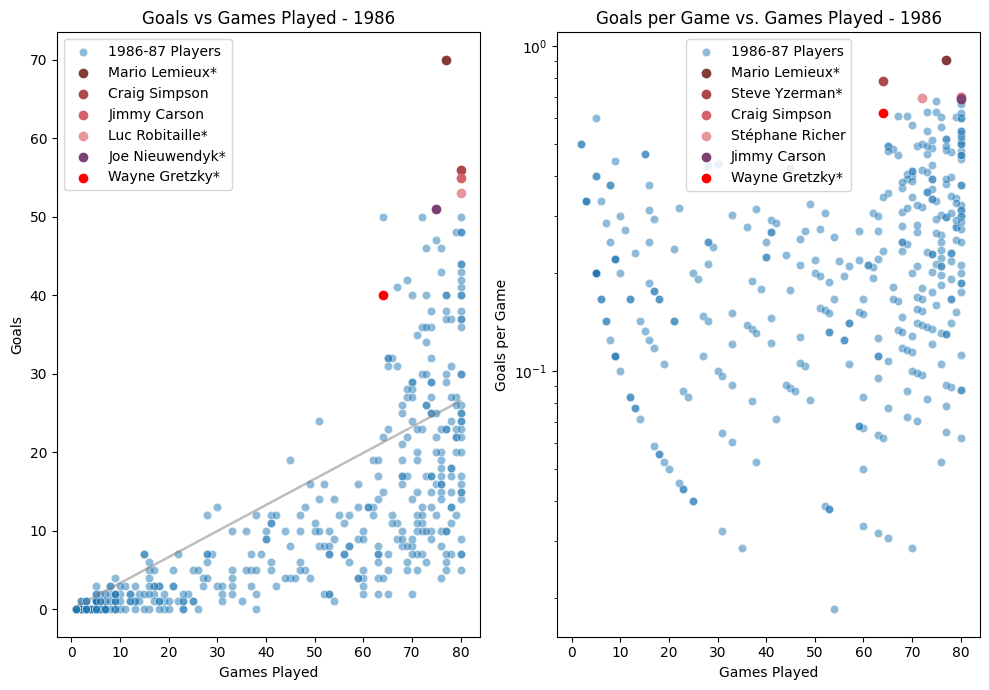

In [8]:

regression_line = get_regression_line(szn_87_df, "GP", "G")
plt.figure(figsize=(10,7))
ax1 = plt.subplot(1,2,1)

ax1 = plot(ax1, szn_87_df, "GP", "G", regression_line, "1986-87 Players", "Goals vs Games Played - 1986", "Games Played", "Goals")

#goals per game
ax2 = plt.subplot(1,2,2)
ax2 = plotratios(ax2, szn_87_df, "GP", "G","1986-87 Players", "Goals per Game vs. Games Played - 1986", "Games Played", "Goals per Game")
plt.tight_layout()




We can see that during this season, Gretzky scored 40 goals in 64 games. However, the expected value of goals scored for a player who played 64 games was a mere 18 - Gretzky had more than doubled expectations.

When comparing on a relative basis to Mario Lemieux, Gretzky appears to lose his star-power, at least for this season. Lemieux, the leading goal-scorer for the season, mustered a very impressive 0.91 goals per game - Gretzky managed 0.625. Still far above average, but something still attainable for "mere mortals". The average goals per game for the season for players with at least 60 games played was 0.30 goals per game.


<h5>Comparing to The 2022-23 Season</h5>

If we were to transport Gretzky to the 2022-23 season, we can see that Gretzky actually performs better. This was a bit shocking to me at first, as I had hypothesized that advances in training methodologies and technology would've increased player effectiveness in recent years. However, this does not seem to be the case. I will go in to more detail on this pattern later, but for now, what seems most striking is that Gretzky is easily within the top 5 by Goals per Game ratio (excluding Kyle Criscuolo with one game played).

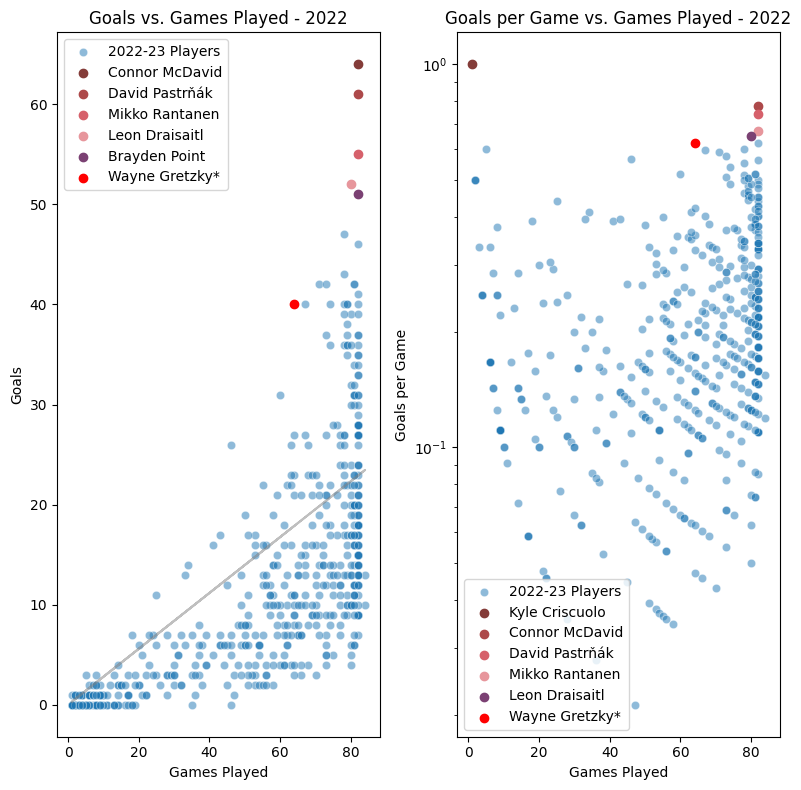

In [9]:
plt.figure(figsize=(8,8))
ax = plt.subplot(1,2,1)
regression_line = get_regression_line(szn_23_df, "GP", "G")
ax = plot(ax, szn_23_df, "GP", "G", regression_line, "2022-23 Players", "Goals vs. Games Played - 2022", "Games Played", "Goals")

ax2 = plt.subplot(1,2,2)
ax2 = plotratios(ax2, szn_23_df, "GP", "G","2022-23 Players", "Goals per Game vs. Games Played - 2022", "Games Played", "Goals per Game")
plt.tight_layout()

Only a handful of players were able to beat Gretzky with more than 50 games played on a goals per game basis - McDavid, Pastrnak, Rantanen, and Draisaitl. Again, Kyle Criscuolo is an anomaly who only played one game and as such should be discounted from this measurement.

Focusing on people with more than 50 games, if we were to compare the results of total goals vs. games played of both the 2023 and 1987 seasons, we can see that they are quite similar. In fact, if we were to create a KDE plot of both seasons, we can see that it actually looks like competition was *steeper* in 1987 - because the distribution has a larger skew.

Overlaying Gretzky on this plot, we can see that Gretzky is far above the expected value for both distributions.

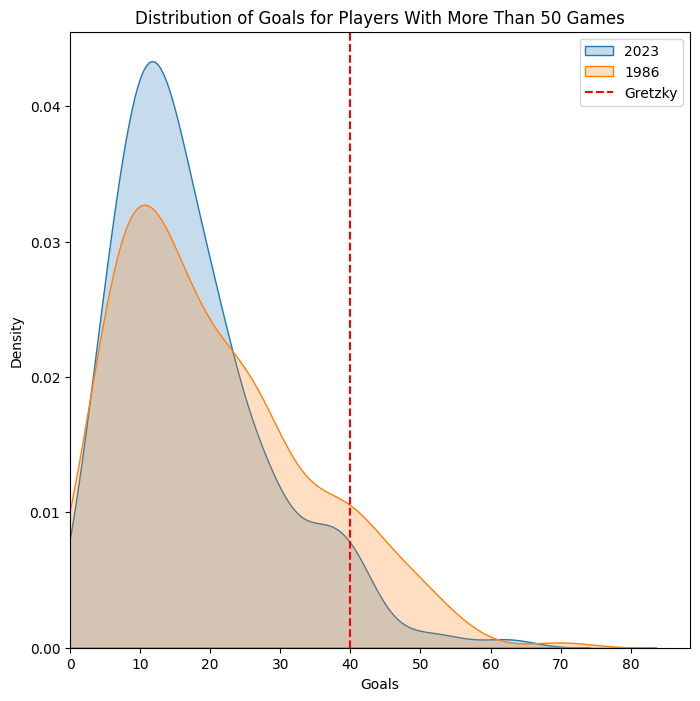

In [10]:
plt.figure(figsize=(8,8))
plt.title("Distribution of Goals for Players With More Than 50 Games")
sns.kdeplot(szn_23_df[szn_23_df['GP']>50], x="G", fill=True, label="2023")
sns.kdeplot(szn_87_df[szn_87_df['GP']>50], x="G", fill=True, label="1986")
plt.xlim(0)
plt.xlabel("Goals")
plt.axvline([szn_23_df[szn_23_df["Player"]=="Wayne Gretzky*"]["G"]], linestyle="--", color="red", label="Gretzky")

plt.legend()
plt.show()

Diving in further, we can create boxplots to see near where Gretzky lies in relation to the quartiles. We can see that Gretzky is far above the 3rd quartile and almost at the top of the IQR for the 2023 season. Comparing the stems of the IQR bands for 2023 and 1987, we can see that our original hypothesis was incorrect - it seems that competition was steeper for Gretzky in '87 than it would be today, and that training methods and better technology did not lead to better teams - something scouts should take note of going forward.

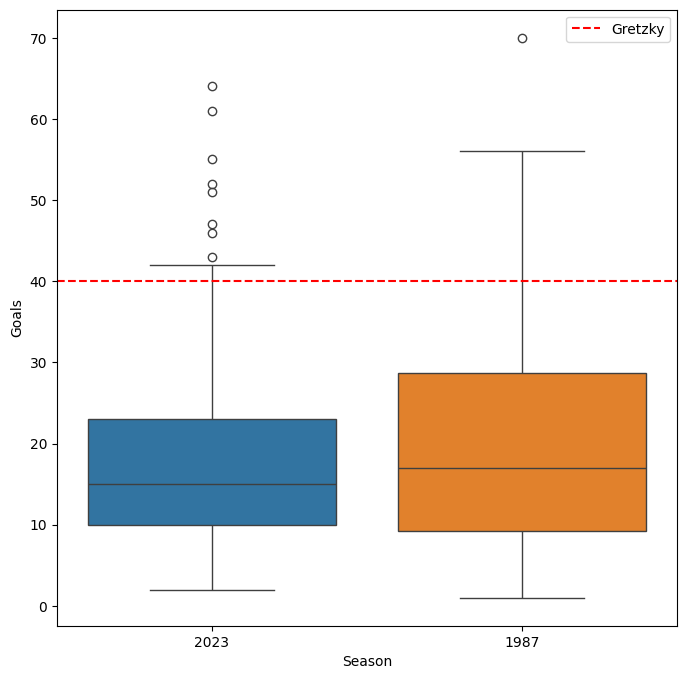

In [11]:
boxplot23data = szn_23_df[szn_23_df['GP']>50]
boxplot87data = szn_87_df[szn_87_df['GP']>50]

boxplot23data['Season'] = "2023"
boxplot87data['Season'] = "1987"
combined_df_greaterthan50 = pd.concat([boxplot23data, boxplot87data])
combined_df_greaterthan50.drop_duplicates(subset=['Player'], inplace=True)

plt.figure(figsize=(8,8))
sns.boxplot(combined_df_greaterthan50, y="G", x="Season", hue="Season")
plt.axhline([szn_23_df[szn_23_df["Player"]=="Wayne Gretzky*"]["G"]], linestyle="--", color="red", label="Gretzky")
plt.legend()
plt.ylabel("Goals")
plt.show()

<h4>Assists</h4>


<h5>The 1986-87 Season</h5>
Perhaps the most astounding part of the Gretzky legend is that he is credited with more assists alone than any other player is credited with total points. 

Averaging an assists-per-game ratio of 1.7, Gretzky was the dominant playmaker of the 1986-87 season. Lemieux, who played almost 20 more games than Gretzky during the season, scored only 98 assists to Gretzky's 109. This trend of team playmaking would later become ubiquitous with Gretzky's career, as even to this day he still holds more assists than any other player holds total points.

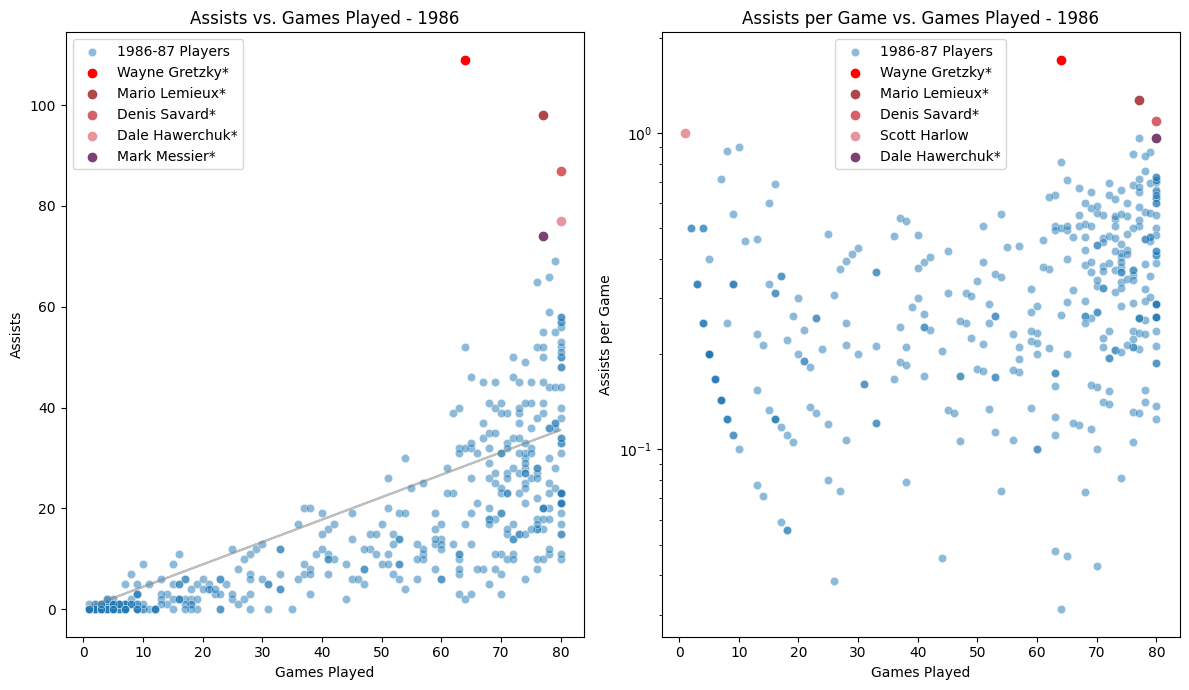

In [12]:
regression_line = get_regression_line(szn_87_df, "GP", "A")
#assists vs games played
plt.figure(figsize=(12,7))
ax1 = plt.subplot(1,2,1)
ax1 = plot(ax1, szn_87_df,"GP", "A", regression_line, "1986-87 Players", "Assists vs. Games Played - 1986", "Games Played", "Assists")

#assists per game
ax2 = plt.subplot(1,2,2)
ax2 = plotratios(ax2, szn_87_df, "GP", "A","1986-87 Players", "Assists per Game vs. Games Played - 1986", "Games Played", "Assists per Game")
plt.tight_layout()

In [13]:
print(szn_23_df[szn_23_df["Player"]=="Connor McDavid"])
szn_87_df[szn_87_df["Player"]=="Wayne Gretzky*"]

      Rk          Player   Age   Tm Pos  GP   G   A  PTS  +/-  ...  PP.1  \
364  589  Connor McDavid  26.0  EDM   C  82  64  89  153   22  ...    50   

     SH.1    S     TOI   ATOI   BLK   HIT    FOW    FOL   FO%  
364     3  352  1836.0  22:23  40.0  89.0  525.0  486.0  51.9  

[1 rows x 27 columns]


,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,PP,SH,GW,EV.1,PP.1,SH.1,S
270,227,Wayne Gretzky*,27,EDM,C,64,40,109,149,39,24,12.8,26,9,5,3,65,40,4,211


<h5>The 2022-23 Season</h5>

Following the trend we discovered with goals scored, it seems that Gretzky's performances with assists are even more impressive today than they were in the 80's.

In 1986, the closest performer to Gretzky was, unsurprisingly, Mario Lemieux. Lemieux, who Gretzky had said was "the greatest player I've ever played against", trailed Gretzky by 11 assits (Gretzky - 109, Lemiuex - 98).

By contrast, in 2022, the closest player trailing Gretzky was Connor McDavid, who scored only 89 assists (9 worse than Lemieux).

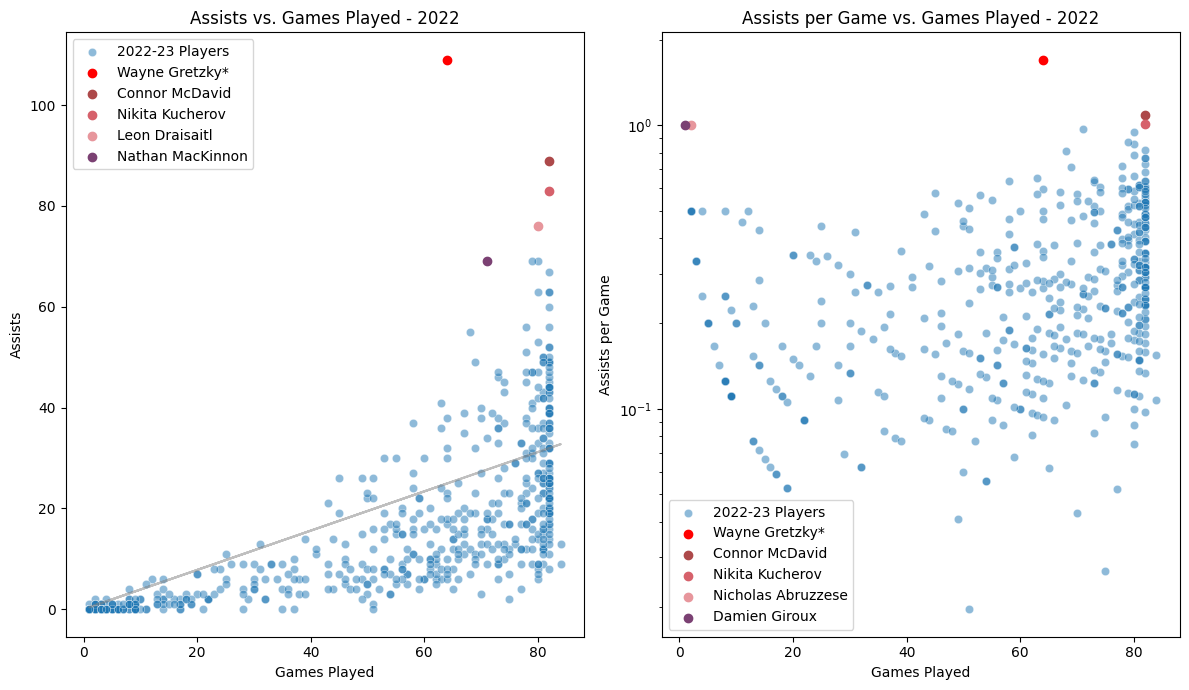

In [14]:
regression_line = get_regression_line(szn_23_df, "GP", "A")
#assists vs games played
plt.figure(figsize=(12,7))
ax1 = plt.subplot(1,2,1)
ax1 = plot(ax1, szn_23_df,"GP", "A", regression_line, "2022-23 Players", "Assists vs. Games Played - 2022", "Games Played", "Assists")

#assists per game
ax2 = plt.subplot(1,2,2)
ax2 = plotratios(ax2, szn_23_df, "GP", "A","2022-23 Players", "Assists per Game vs. Games Played - 2022", "Games Played", "Assists per Game")
plt.tight_layout()

When comparing the distributions of the two season's Assists metric (for players with more than 50 games), we can see that they are much more similar than that of the Goals metric. However, again we see that the 1986 data is more skewed than the 2022 data, implying that 1986 had a higher concentration of very talented players.

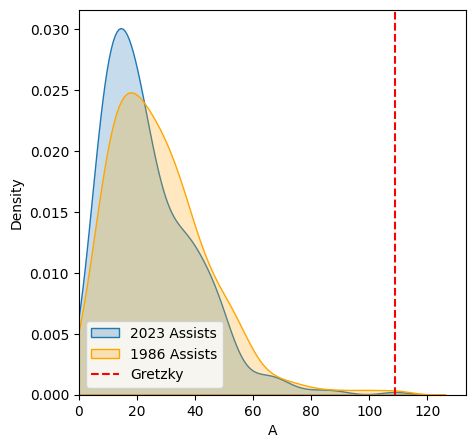

In [15]:
plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
sns.kdeplot(szn_23_df[szn_23_df['GP']>50], x="A", fill=True, label="2023 Assists")
sns.kdeplot(szn_87_df[szn_87_df['GP']>50], x="A", fill=True, color="orange", label="1986 Assists")
ax.axvline([szn_23_df[szn_23_df["Player"]=="Wayne Gretzky*"]["A"]], linestyle="--", color="red", label="Gretzky")
ax.set_xlim(0)
plt.legend()

Finally, combining all players of both seasons with more than 50 games, we can get a true sense of where Gretzky himself lies in the total distribution. Our next plot displays Assists per Game on the y-axis, and Games Played on the x-axis. We can readily see that Gretzky was below-average for games played, and the highest outlier for Assists per Game, making his performance all the more impressive.

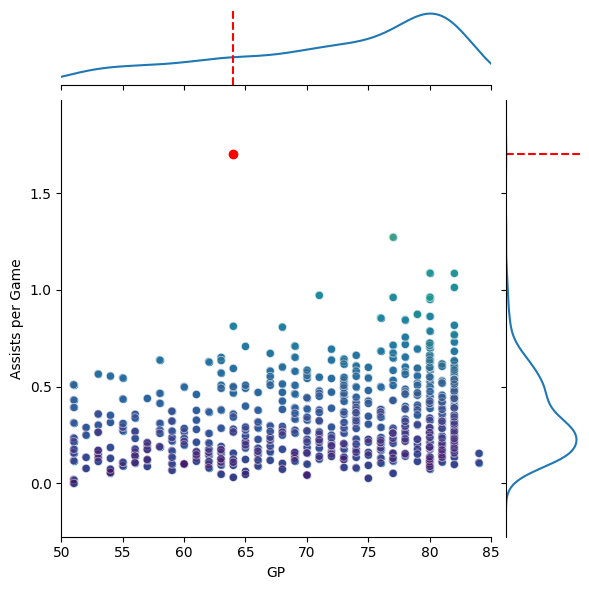

In [16]:
combined_df_greaterthan50['Assists per Game'] = combined_df_greaterthan50['A']/combined_df_greaterthan50["GP"]
joint = sns.JointGrid(combined_df_greaterthan50, x="GP", y="Assists per Game", xlim=(50,85))
joint.plot(sns.scatterplot, sns.kdeplot)
scatter = sns.scatterplot(data=combined_df_greaterthan50, x="GP", y="Assists per Game", hue="Assists per Game", palette="viridis", ax=joint.ax_joint, alpha=0.5)
scatter.legend_.remove()
joint.ax_marg_x.axvline([combined_df_greaterthan50[combined_df_greaterthan50['Player']=="Wayne Gretzky*"]['GP']], linestyle="--", color="red")
joint.ax_marg_y.axhline([combined_df_greaterthan50[combined_df_greaterthan50['Player']=="Wayne Gretzky*"]['Assists per Game']], linestyle="--", color="red")
joint.ax_joint.scatter([combined_df_greaterthan50[combined_df_greaterthan50['Player']=="Wayne Gretzky*"]['GP']], [combined_df_greaterthan50[combined_df_greaterthan50['Player']=="Wayne Gretzky*"]['Assists per Game']], color="red", label="Gretzky")


<h4>Total Points</h4>

Our final offensive metric will measure the total effectiveness of a player - how many goals and assists combined were they responsible for.

<h5>The 1986-87 Season</h5>

In the 1986-87 season, competition between Gretzky and Lemieux was tough. We have seen that Lemieux beat Gretzky with goals scored, as Gretzky answered back by beating Lemieux with Assists. 

The case with total points is a bit more nuanced. We can see that Lemieux was able to beat Gretzky by total points. However, given that Lemieux played almost 20 more games than Gretzky in the season, this makes logical sense. What is quite impressive is that Gretzky was able to beat Lemieux in Points per Game, with Gretzky scoring 2.32 Points per Game and Lemieux scoring 2.18.

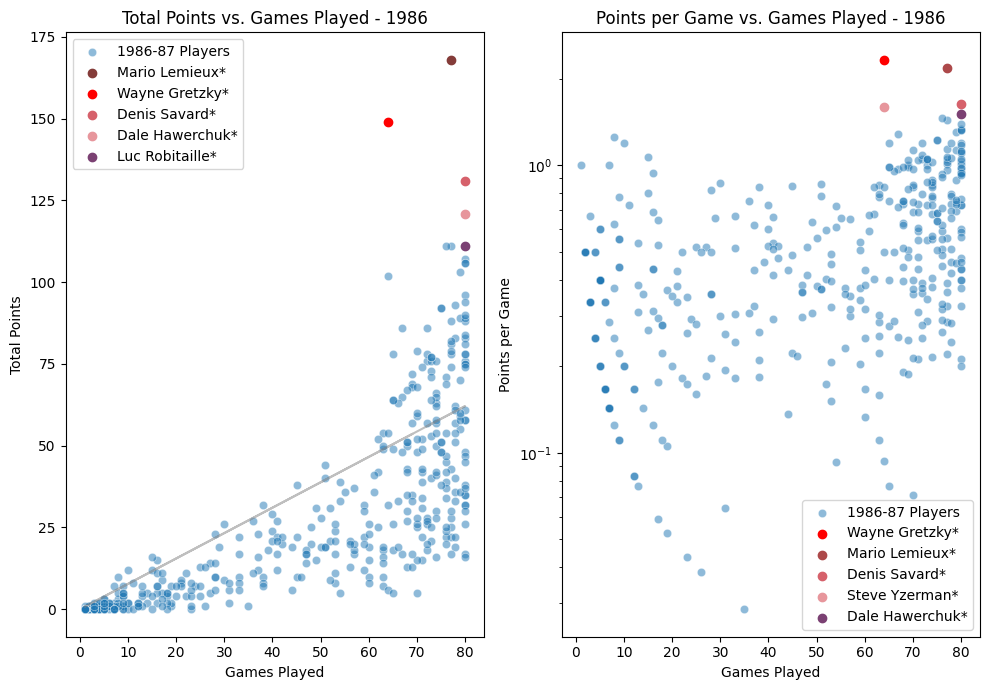

In [17]:
regression_line = get_regression_line(szn_87_df, "GP", "PTS")
plt.figure(figsize=(10,7))
ax = plt.subplot(1,2,1)
ax = plot(ax, szn_87_df, "GP", "PTS", regression_line, "1986-87 Players", "Total Points vs. Games Played - 1986", "Games Played", "Total Points")

ax2 = plt.subplot(1,2,2)
ax2 = plotratios(ax2, szn_87_df, "GP", "PTS","1986-87 Players", "Points per Game vs. Games Played - 1986", "Games Played", "Points per Game")
plt.tight_layout()

The fact that Gretzky outshines Lemieux on a per-game points basis may be surprising to some because we had determined that Lemieux was the more effective goal-scorer and shot-taker for this season. However, in Hockey, assists and goals both count for one point. Gretzky's astounding playmaking abilities allowed him to overtake all others on a points-per-game basis. 

<h5>The 2022-23 Season</h5>

Again, we can see that Gretzky is outshined by total points earned, this time by Connor McDavid. However, this time around, the gap between Gretzky and his points rival is far greater. In 2022, Connor McDavid averaged about 1.86 Points per Game, far fewer than Gretzky's 2.32, and even far fewer than Lemieux's 2.18.

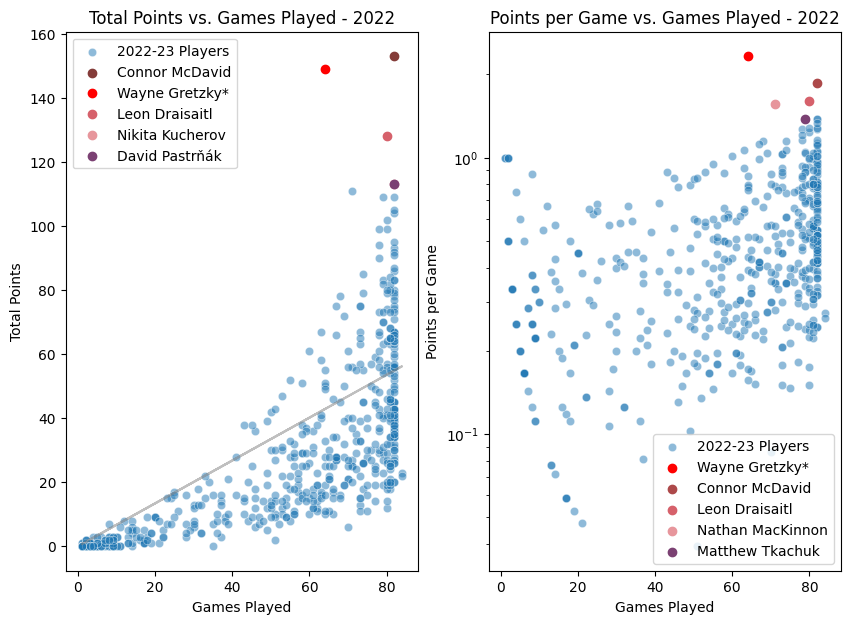

In [18]:
regression_line = get_regression_line(szn_23_df, "GP", "PTS")
plt.figure(figsize=(10,7))
ax = plt.subplot(1,2,1)
ax = plot(ax, szn_23_df, "GP", "PTS", regression_line, "2022-23 Players", "Total Points vs. Games Played - 2022", "Games Played", "Total Points")

ax2 = plt.subplot(1,2,2)
ax2 = plotratios(ax2, szn_23_df, "GP", "PTS","2022-23 Players", "Points per Game vs. Games Played - 2022", "Games Played", "Points per Game")


One thing I find quite intriguing is just how many players are "below average" by offensive metrics. The vast majority of players fall beneath our regression lines during both the 1986 and 2022 seasons - meaning players like Gretzky, Lemieux, and McDavid, among other outliers, greatly distort the average. 

<h3>Defensive Effectiveness</h3>



<h4>Plus Minus</h4>
Though Gretzky's position was primarily offensive, all members of the team must be part of the defensive effort when the puck is in their own zone. 

To measure defensive effectiveness, we will analyze players Plus/Minus score on a per-game basis. 

*What is plus/minus?*

Plus/Minus points are awarded to every player on the ice when a goal is scored.

If Team A scores a goal, every player on the ice for team A recieves +1 point, while every player on Team B recieves -1 point. The inverse is also true - if Team B scores, on-ice Team B players recieve +1, on-ice Team A players -1.

If a player ends a game with a positive score, they were effective offensively *and* defensively, as they disproportionately contributed to goals-for, rather than goals-against.

<h5>The 1986-87 Season</h5>
Plotting Plus/Minus scores for the 1986 season, we can see how Gretzky is the leading player on a per-game basis (players > 50 games played), as well as placing number 2 for the season in total plus-minus score. 

Gretzky's efficiency both offensively and defensively comes to light after analyzing his Plus/Minus record. Outpacing even Lemieux by a large margin (who did not appear in the top 5), Gretzky was credited with far more Plus/Minus points than any other player with similar games played. In fact, only one player - Hakan Loob - beat him with total plus minus points, but only managed the feat after playing 20 more games than Gretzky.


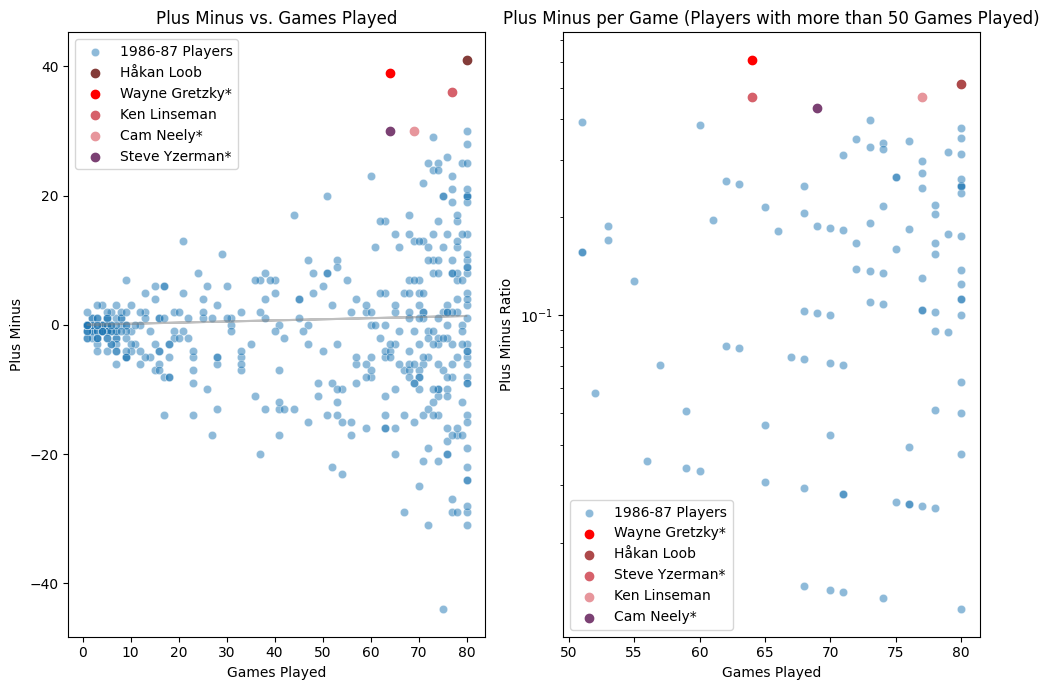

In [19]:
plt.figure(figsize=(10,7))
regression_line = get_regression_line(szn_87_df, "GP", "+/-")
ax = plt.subplot(1,2,1)
ax = plot(ax, szn_87_df, "GP", "+/-", regression_line, "1986-87 Players", "Plus Minus vs. Games Played", 'Games Played', "Plus Minus")
ax = plt.subplot(1,2,2)
ax = plotratios(ax, szn_87_df[szn_87_df['GP']>50], "GP", "+/-", "1986-87 Players", "Plus Minus per Game (Players with more than 50 Games Played)", "Games Played", "Plus Minus Ratio")
plt.tight_layout()

<h5>The 2022-23 Season</h5>

Comparing Gretzky's Plus-Minus to modern day, a familiar pattern comes through. Gretzky pulls away from the herd by a larger margin on a per-game ratio, and is still present in the top 5 on total plus-minus earned.

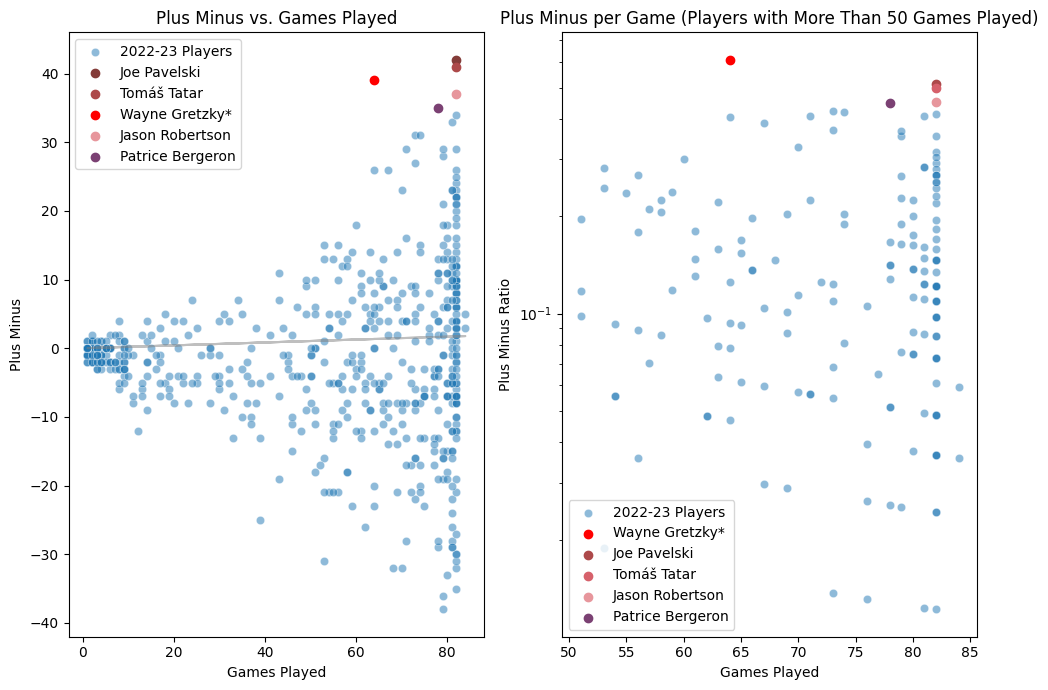

In [20]:
plt.figure(figsize=(10,7))
regression_line = get_regression_line(szn_23_df, "GP", "+/-")
ax = plt.subplot(1,2,1)
ax = plot(ax, szn_23_df, "GP", "+/-", regression_line, "2022-23 Players", "Plus Minus vs. Games Played", 'Games Played', "Plus Minus")
ax = plt.subplot(1,2,2)
ax = plotratios(ax, szn_23_df[szn_23_df['GP']>50], "GP", "+/-", "2022-23 Players", "Plus Minus per Game (Players with More Than 50 Games Played)", "Games Played", "Plus Minus Ratio")
plt.tight_layout()

When we analyze the distributions of plus minus, we notice that the distributions for the seasons are quite similar. It seems that 1986-87 is more right-skewed while 2022 is a tad more left-skewed, but it is marginal. Gretzky appears far above the EV of both distributions.

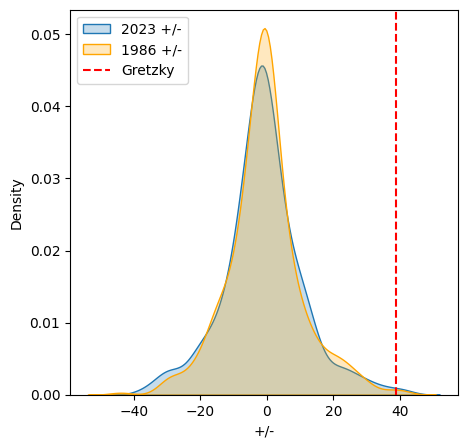

In [21]:
plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
sns.kdeplot(szn_23_df, x="+/-", fill=True, label="2023 +/-")
sns.kdeplot(szn_87_df, x="+/-", fill=True, color="orange", label="1986 +/-")
ax.axvline([szn_23_df[szn_23_df["Player"]=="Wayne Gretzky*"]["+/-"]], linestyle="--", color="red", label="Gretzky")
plt.legend()

<h3>Team Liability</h3>



<h4>Penalties in Minutes</h4>



Finally, a player can be considered a liability to their team if they take penalties. Penalties, especially at when behind, are a great liability to a team and can greatly impact the game's outcome. 

This is because in hockey, when a minor penalty is taken, the at-fault team must play short-handed.

Hockey is usually 5-on-5, but when a minor penalty is committed, can become 5-on-4. If a team commits two minor penalties within a two-minute period, the game can even become 5-on-3. This results in what is called a `power-play` for the team that did not commit the penalty, and a `penalty-kill` for the team that did commit it.

Numerous games have been won and lost because of a power-play goal. Keeping penalty-kills to an absolute minimum is key to winning games and scoring points, therefore, an important metric for teams to track when recruiting players.



<h5> The 1986-87 Season</h5>

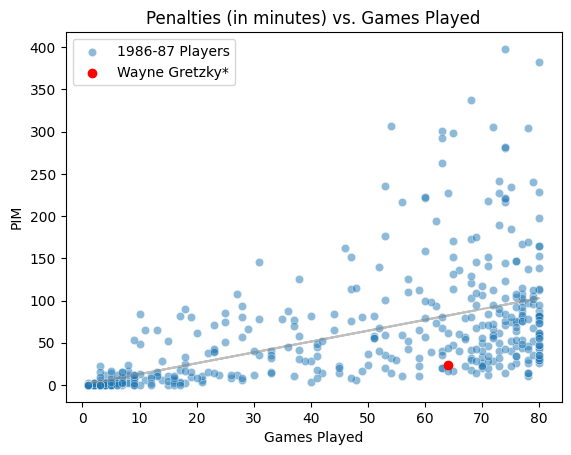

In [22]:
regression_line = get_regression_line(szn_87_df, "GP", "PIM")
ax = plt.subplot(1,1,1)
ax = plot(ax, szn_87_df, "GP", "PIM", regression_line, "1986-87 Players", "Penalties (in minutes) vs. Games Played", 
          'Games Played', "PIM", plottop5=False)

In [23]:
szn_87_df[szn_87_df["GP"] > 55]["PIM"].describe()

count    214.000000
mean      95.032710
std       75.800107
min       10.000000
25%       42.000000
50%       74.000000
75%      114.750000
max      398.000000
Name: PIM, dtype: float64

As we can see, Gretzky is far below the expected value of someone with his games-played exposure. Among players with more than 55 games played, the average is 95 penalty minutes, while the median is 74 penalty minutes. Gretzky's mere 24 minutes puts him far beneath even the first quartile (42 penalty minutes). 

This means that Gretzky, especially considering his astounding Plus/Minus record and playmaking (Assists) abilities, is especially valuable to his team, considering that he provides great offensive and defensive upside and is not a liability to his team for incurring penalties.

<h5>The 2022-23 Season</h5>

We can compare the scatterplot of 1986's penalty minutes to 2022's to get a more accurate picture:

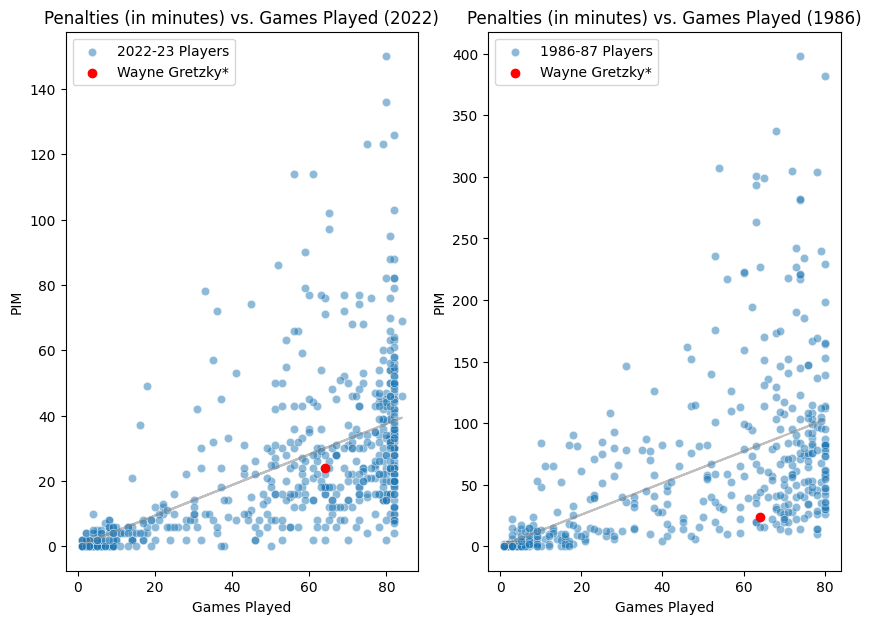

In [24]:
regression_line = get_regression_line(szn_23_df, "GP", "PIM")
plt.figure(figsize=(10,7))
ax = plt.subplot(1,2,1)
ax = plot(ax, szn_23_df, "GP", "PIM", regression_line, "2022-23 Players", "Penalties (in minutes) vs. Games Played (2022)", 
          'Games Played', "PIM", plottop5=False)

regression_line = get_regression_line(szn_87_df, "GP", "PIM")

ax2 = plt.subplot(1,2,2)
ax2 = plot(ax2, szn_87_df, "GP", "PIM", regression_line, "1986-87 Players", "Penalties (in minutes) vs. Games Played (1986)", 
          'Games Played', "PIM", plottop5=False)


One thing that is astounding is the scale of these plots. Without adjusting the scale, we can see that players in 1986 took far more penalties than players in 2022. Gretzky is much closer to an average player in 2022 than he is in 1986, where he is far below average in penalty minutes. 

Most shocking is the range of the distribution, which is more easily visualized with a KDE plot:

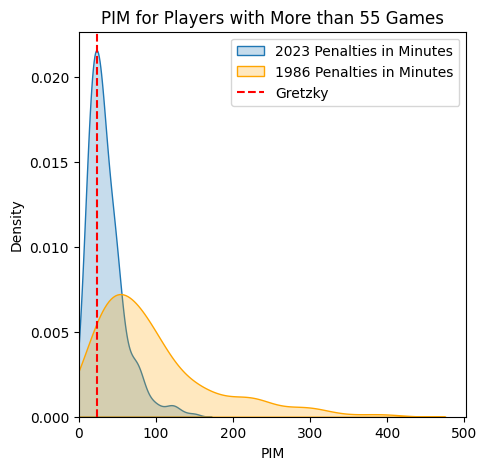

In [25]:
plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
sns.kdeplot(szn_23_df[szn_23_df["GP"] > 55], x="PIM", fill=True, label="2023 Penalties in Minutes")
sns.kdeplot(szn_87_df[szn_87_df["GP"] > 55], x="PIM", fill=True, color="orange", label="1986 Penalties in Minutes")
ax.axvline([szn_23_df[szn_23_df["Player"]=="Wayne Gretzky*"]["PIM"]], linestyle="--", color="red", label="Gretzky")
ax.set_xlim(0)
ax.set_title("PIM for Players with More than 55 Games")
plt.legend()

Using two violin plots with an equal Y-axis, we can really get a sense of how much more violent the game was in 1986 compared to today. The 1986 median is almost at the top of 2022's IQR! In any case, Gretzky is not considered a team liability. In 1986, he is almost at the bottom of the IQR below the 25th percentile. In 2022, he is much higher due to the lesser amount of penalties taken as a whole, but still below the median. This is yet another important statistic that scouts may want to consider when assessing new talent.

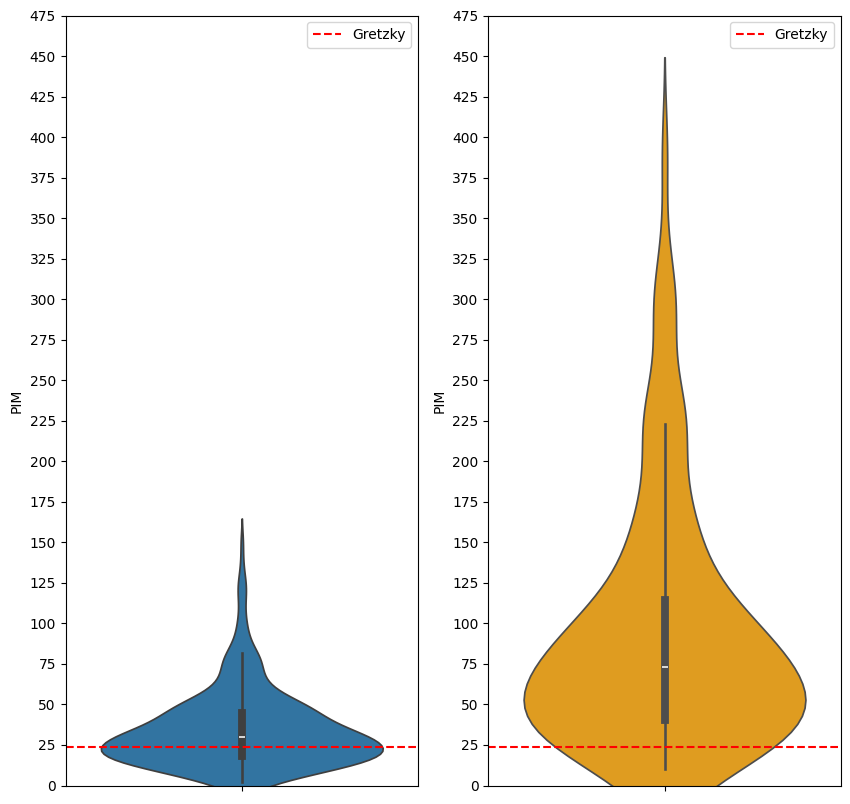

In [26]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(1,2,1)
sns.violinplot(szn_23_df[szn_23_df['GP']>50], y='PIM')
ax1.axhline([szn_87_df[szn_87_df["Player"]=="Wayne Gretzky*"]["PIM"]],linestyle="--", color="red", label="Gretzky")
plt.yticks(np.array(range(0,500,25)))
plt.ylim(0)
plt.legend()
ax2 = plt.subplot(1,2,2)
sns.violinplot(szn_87_df[szn_87_df['GP']>50], y="PIM", color="orange")
plt.yticks(np.array(range(0,500,25)))
ax2.axhline([szn_23_df[szn_23_df["Player"]=="Wayne Gretzky*"]["PIM"]],linestyle="--", color="red", label="Gretzky")
plt.ylim(0)
plt.legend()
plt.show()


<h2> Section 1 Recap</h2>



<h1>Section 2: How Similar are Other Greats to Gretzky? </h1>

To confirm if scouts should prioritize "Gretzky-like" performance among their candidates, we should attempt to determine if "Gretzky-like" performance really does correlate with greatness. To accomplish this, we will follow the steps below:

1. We will create a combined dataframe containing the "All-Time Greats" and players of today (2022-23). 

2. We will perform dimensionality reduction using PCA.

3. We will train a K-Means algorithm to cluster players together, and visualize how many all-time greats appear in Gretzky's cluster, compared to other clusters.


Our first step will be loading the all-time greats data and combining it with our 2022-23 data.

In [27]:
important_cols = ["Player", "PIM", "+/-", "PTS", "G", "GP", "A"]
greats_df.drop([col for col in greats_df.columns if col not in important_cols], inplace=True, axis=1)

for col in greats_df.columns.values:
    if col in ["PIM", "+/-", "PTS", "G","A"]:
        greats_df[f"{col}_perGame"]= greats_df.apply(lambda x: x[col]/x['GP'], axis=1)


for col in szn_23_df.columns.values:
    if col in ["PIM", "+/-", "PTS", "G","A"]:
        szn_23_df[f"{col}_perGame"]= szn_23_df.apply(lambda x: x[col]/x['GP'], axis=1)

greats_df['ATG'] = 1

In [31]:
greats_combined = pd.concat([greats_df[["Player","GP","PIM_perGame", "+/-_perGame", "PTS_perGame", "G_perGame","A_perGame", "ATG"]], szn_23_df[["Player","GP","PIM_perGame", "+/-_perGame", "PTS_perGame", "G_perGame","A_perGame"]]])
greats_combined['ATG'].fillna(0, inplace=True)
greats_combined.drop_duplicates(inplace=True)

In [32]:
greats_combined

,Player,GP,PIM_perGame,+/-_perGame,PTS_perGame,G_perGame,A_perGame,ATG
0,Roberto Luongo,1044,2.409004,0.118774,0.375479,0.588123,0.468391,1.0
1,Gordie Howe,1767,0.953594,0.090549,1.046972,0.453311,0.593662,1.0
2,Jaromir Jagr,1733,0.673399,0.185805,1.108482,0.442008,0.666474,1.0
3,Sidney Crosby,1272,0.647013,0.170597,1.254717,0.465409,0.789308,1.0
4,Nathan MacKinnon,791,0.439949,0.185841,1.136536,0.423515,0.713021,1.0
...,...,...,...,...,...,...,...,...
567,Trevor Zegras,81,1.086420,-0.296296,0.802469,0.283951,0.518519,0.0
568,Mika Zibanejad,82,0.243902,0.304878,1.109756,0.475610,0.634146,0.0
569,Mats Zuccarello,78,0.333333,-0.038462,0.858974,0.282051,0.576923,0.0
570,Jason Zucker,78,0.602564,-0.051282,0.615385,0.346154,0.269231,0.0


In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

greats_combined_pca = pca.fit_transform(greats_combined[["PIM_perGame", "+/-_perGame", "PTS_perGame", "G_perGame","A_perGame"]])

greats_combined_pca


array([[ 8.95887264e-01,  1.74257903e+00,  1.05773629e-01,
         1.86447952e-01,  3.76123029e-01],
       [ 8.53375387e-01,  1.97561447e-01, -1.18963458e-01,
         4.80849027e-02, -4.99121518e-03],
       [ 8.56979847e-01, -1.02927888e-01, -5.88767452e-02,
        -5.50841464e-03, -2.46949642e-03],
       ...,
       [ 4.01057512e-01, -2.91225692e-01, -1.58940986e-01,
        -9.74394541e-02,  1.32474445e-03],
       [ 2.06240880e-01,  6.91994705e-02, -5.22526160e-02,
         1.29511035e-01, -3.20070773e-03],
       [ 2.25005093e+00, -9.52410929e-01, -2.28599370e-01,
        -4.21437985e-01,  3.89266390e-03]])

In [43]:
greats_combined['PC1'] = greats_combined_pca[:,0]
greats_combined['PC2'] = greats_combined_pca[:,1]


<Axes: xlabel='Cluster', ylabel='ATG'>

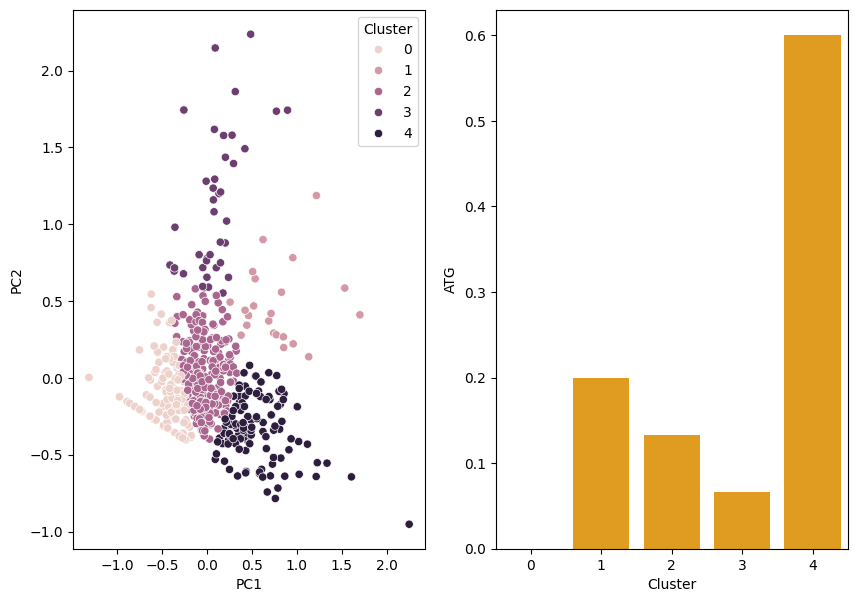

In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

greats_combined['Cluster'] = kmeans.fit_predict(greats_combined[['PC1', "PC2"]])

greats_per_cluster = greats_combined.groupby("Cluster")['ATG'].sum()/len(greats_df)
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.scatterplot(greats_combined, x='PC1', y='PC2', hue="Cluster")
plt.subplot(1,2,2)
sns.barplot(greats_per_cluster, color="Orange")

In [59]:
from scipy.spatial import Voronoi, voronoi_plot_2d
cluster_centers = kmeans.cluster_centers_
cluster_centers


array([[-0.47980074, -0.12909177],
       [ 0.77658771,  0.4716097 ],
       [-0.024315  ,  0.01408922],
       [ 0.07710414,  1.1166974 ],
       [ 0.54427062, -0.33475556]])

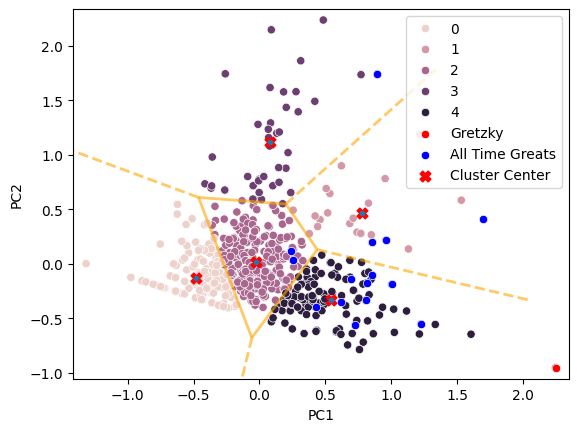

In [77]:
voronoi = Voronoi(cluster_centers)
sns.scatterplot(greats_combined, x='PC1', y='PC2', hue="Cluster")
sns.scatterplot(greats_combined[greats_combined["Player"]=="Wayne Gretzky*"], x='PC1', y='PC2', color="Red", label="Gretzky")
sns.scatterplot(greats_combined[greats_combined["ATG"]==1], x='PC1', y='PC2', color="Blue", label='All Time Greats')
voronoi_plot_2d(voronoi, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="X", color='red', s=60, label='Cluster Center')
plt.xlim(greats_combined["PC1"].min() - 0.1, greats_combined["PC1"].max() + 0.1)
plt.ylim(greats_combined["PC2"].min() - 0.1, greats_combined['PC2'].max() + 0.1)
plt.legend()